### Datasets

In [ ]:
!mkdir /content/multicue-dataset
!tar -xvf /content/drive/MyDrive/multicue-dataset.tar.bz2 -C /content/multicue-dataset

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [ ]:
def get_all_files(path):
    all_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files

In [ ]:
path_folder = '/content/multicue-dataset/multicue/ground-truth/images/boundaries/'
img_list = get_all_files(path_folder)
img_list.sort()

In [ ]:
img_all_list = []
for i in range(0, len(img_list), 5):
    img_sublist = img_list[i:i+5]
    img_all_list.append(img_sublist)

print(len(img_all_list))

0


In [ ]:
pathes = img_all_list[0]

IndexError: ignored

In [ ]:
images = []
for path in pathes:
    img_temp = Image.open(path)
    img_temp = img_temp.convert("L")
    img_temp = np.array(img_temp, dtype=np.float32)
    images.append(img_temp)

In [ ]:
allimg = None
for img in images:
    if allimg is None:
        allimg = img
    else:
        allimg = allimg + img

In [ ]:
def PrintImage(image):
    # set image size
    plt.figure(figsize=(14, 10))
    # show images_filtered in grayscale with pyplot
    plt.imshow(image, cmap='gray')
    # remove axis
    plt.axis('off')
    plt.show()

def SelectMatch(num_match, image, kernel_size=None, with_unbold=False):
    temp_image = np.zeros(image.shape, dtype=float)
    mask = image >= (255 * num_match - 1)
    temp_image = np.where(mask, image, image * 0.1)
    if kernel_size:
        print(mask.shape)
        bold_part = np.where(mask, 255, 0).astype(np.uint8)
        unbold_part = np.where(~mask, temp_image, 0).astype(np.uint8)
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        temp_image = cv2.dilate(bold_part, kernel, iterations=1)
        if with_unbold:
            temp_image = temp_image + unbold_part
        else:
            temp_image = temp_image
    return temp_image

In [ ]:
allimage = np.zeros(images[0].shape, dtype=float)

for i in range(len(images)):
    temp_image = np.where(images[i] > 0, 255, 0)
    PrintImage(temp_image)
    allimage = allimage + temp_image

print(allimage.max())
print(allimage.min())
print(allimage[allimage > 0].mean())
print(allimage[allimage < 255].mean())

result_images = []
for i in range(5):
    result_image = SelectMatch(i + 1, allimage, kernel_size=3)
    result_images.append(result_image)
    #PrintImage(result_image)

# print(scaled_allimage.max())
# print(scaled_allimage.min())
# print(scaled_allimage.mean())
# print(scaled_allimage.std())

In [ ]:
min_value = np.min(allimg)
max_value = np.max(allimg)

scaled_images = 255 * (allimg - min_value) / (max_value - min_value)

scaled_images = np.round(scaled_images).astype(np.uint8)

In [ ]:
scaled_images = np.where(allimg > 0, 255, 0).astype(np.uint8)

In [ ]:
PrintImage(scaled_images)

resized_image = cv2.resize(scaled_images, None, fx=1/3, fy=1/3, interpolation=cv2.INTER_AREA)

sharpening_kernel = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(resized_image, -1, sharpening_kernel)

enlarged_image = cv2.resize(sharpened_image, None, fx=3, fy=3, interpolation=cv2.INTER_LINEAR)

anti_aliasing_kernel = np.array([[1, 2, 1],
                                [2, 4, 2],
                                [1, 2, 1]]) / 16
smoothed_image = cv2.filter2D(enlarged_image, -1, anti_aliasing_kernel)

PrintImage(smoothed_image)

In [ ]:
images_arr = np.array(images)

mask = images_arr[:, None] != 0
mask = mask.sum(axis=0)

images_filtered = np.where(mask >= 3, images_arr, 0.0 * images_arr)

filtered_allimg = None
for img in images_filtered:
    if filtered_allimg is None:
        filtered_allimg = img
    else:
        filtered_allimg = filtered_allimg + img

kernel = np.ones((2, 2), np.uint8)

_, binary_img = cv2.threshold(filtered_allimg, 128, 255, cv2.THRESH_BINARY)
img_dilation = cv2.dilate(binary_img, kernel, iterations=1)

In [ ]:
# set image size
plt.figure(figsize=(14, 10))
# show images_filtered in grayscale with pyplot
plt.imshow(merged_image, cmap='gray')
# remove axis
plt.axis('off')
plt.show()

In [ ]:
print(allimg.shape)
print(allimg.max())
print(allimg.min())
print(allimg.mean())
print(allimg.std())

In [ ]:
filtered_allimg.shape

### Dataset nice

In [ ]:
#!rm -rf /content/multicue_pidinet

In [ ]:
!apt-get -qq install unrar

In [ ]:
!unrar x /content/drive/MyDrive/datasets/multicue_pidinet.rar

In [ ]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [ ]:
def get_all_files(path):
    all_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            all_files.append(os.path.join(root, file))
    return all_files

In [ ]:
path_folder_boundary = "/content/multicue_pidinet/gt/boundary/s1.0/r0.0"
img_list_boundary = get_all_files(path_folder_boundary)
img_list_boundary.sort()

In [ ]:
path_folder_edge = "/content/multicue_pidinet/gt/edge/s1.0/r0.0"
img_list_edge = get_all_files(path_folder_edge)
img_list_edge.sort()

In [ ]:
path_folder_source = "/content/multicue_pidinet/images/s1.0/r0.0"
img_list_source = get_all_files(path_folder_source)
img_list_source.sort()

In [ ]:
print(len(img_list_boundary))
print(len(img_list_edge))
print(len(img_list_source))

100
100
100


In [ ]:
img_pairs = []
for img_boundary_el_path, img_edge_el_path, img_source_el_path in zip(img_list_boundary, img_list_edge, img_list_source):
    img_temp_1 = Image.open(img_boundary_el_path)
    img_temp_1 = img_temp_1.convert("L")
    img_temp_1 = np.array(img_temp_1, dtype=np.float32)
    img_temp_2 = Image.open(img_edge_el_path)
    img_temp_2 = img_temp_2.convert("L")
    img_temp_2 = np.array(img_temp_2, dtype=np.float32)
    img_pairs.append([img_temp_1, img_temp_2, img_source_el_path])

In [ ]:
import matplotlib.image as mpimg

def PrintImage(image, invert=True):
    # set image size
    plt.figure(figsize=(14, 10))
    # show images_filtered in grayscale with pyplot
    if type(image) == str:
        img = mpimg.imread(image)
        plt.imshow(img)
    else:
        if invert:
            plt.imshow(255 - image, cmap="gray")
        else:
            plt.imshow(image, cmap="gray")
    # remove axis
    plt.axis('off')
    plt.show()

def MergeImg(image1, image2, kernel_size=None, with_parts=False):
    mask = (image1 != 0) & (image2 != 0)
    temp_image = np.where(mask, 255, 0)
    if kernel_size:
        #print(mask.shape)
        temp_image = np.where(mask, 255, 0).astype(np.uint8)
        #unbold_part = np.where(~mask, temp_image, 0).astype(np.uint8)
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        #temp_image = cv2.dilate(temp_image, kernel, iterations=1)
        if with_parts:
            temp_image = temp_image + image1 * 2 + image2 * 2
        else:
            temp_image = temp_image
    return temp_image

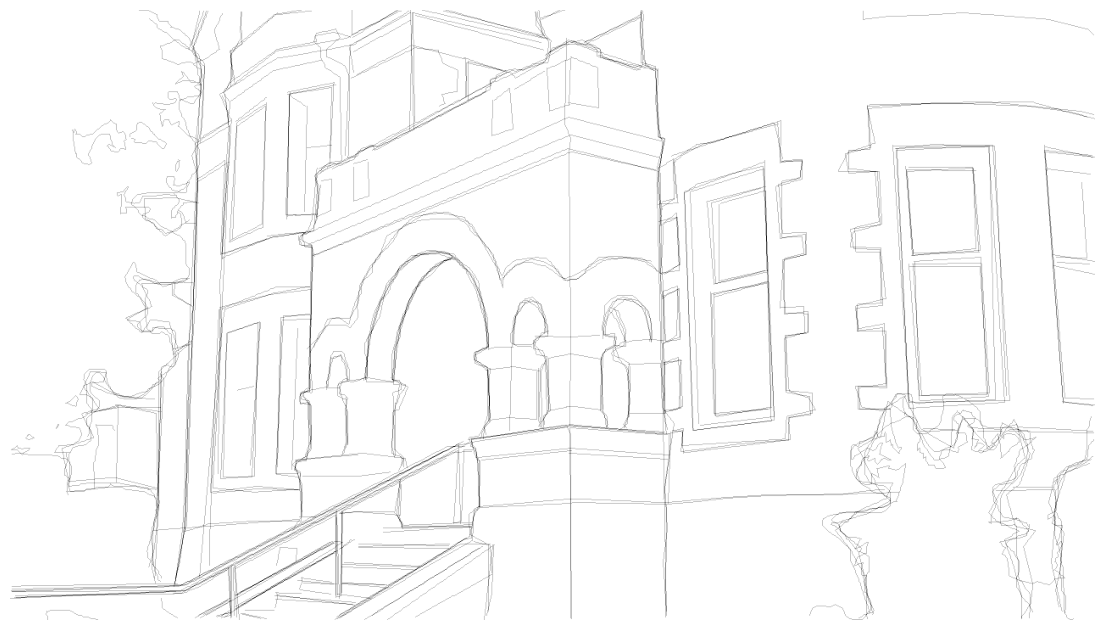

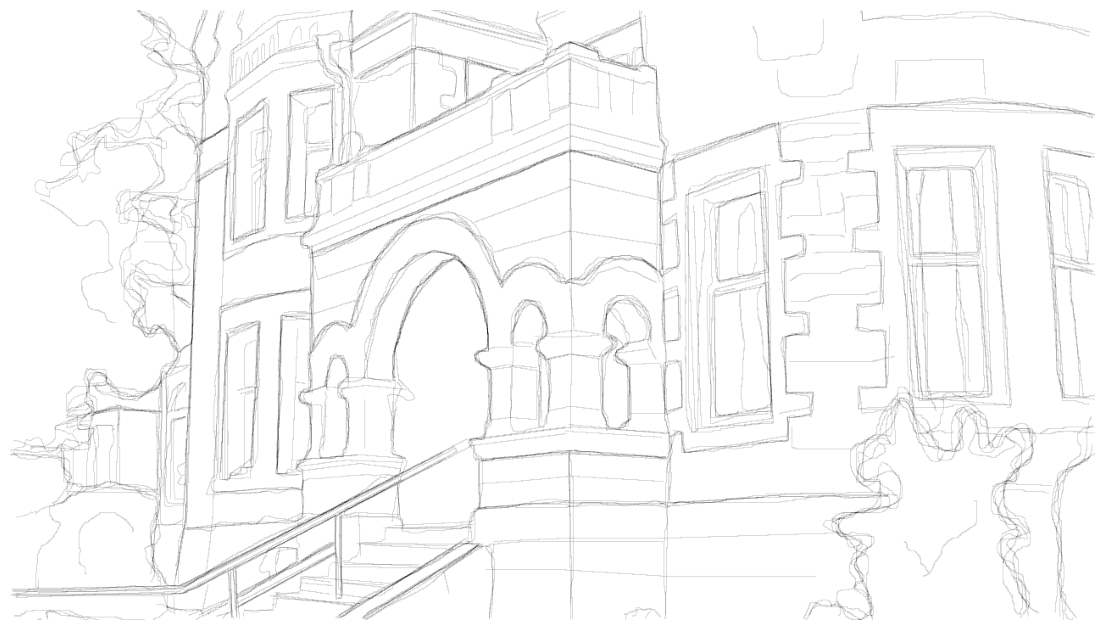

In [ ]:
PrintImage(img_pairs[9][0])
PrintImage(img_pairs[9][1])

In [ ]:
for i in tqdm(range(len(img_pairs)), position=0, leave=True):
    merged = MergeImg(img_pairs[i][0], img_pairs[i][1], kernel_size=2)
    # PrintImage(img_pairs[i][2])
    # PrintImage(merged)
    #merged = merged.max() - merged
    rgb_image = mpimg.imread(img_pairs[i][2])

    resized_rgb_image = cv2.resize(rgb_image, (512, 512))
    resized_rgb_image = cv2.cvtColor(resized_rgb_image, cv2.COLOR_RGB2BGR) # BGR
    resized_grayscale_image = cv2.resize(merged, (512, 512))

    # Convert the grayscale image to RGB format
    resized_grayscale_image_rgb = cv2.cvtColor(resized_grayscale_image, cv2.COLOR_GRAY2BGR) # BGR
    resized_grayscale_image_rgb = 255 - resized_grayscale_image_rgb
    resized_grayscale_image_rgb = (resized_grayscale_image_rgb / 255.0)

    # Create a new 1024x512 image by concatenating the two resized images horizontally
    combined_image = np.hstack((resized_rgb_image * 255, resized_grayscale_image_rgb * 255)).astype(np.uint8)

    #PrintImage(combined_image)
    # set image size to (14, 10)
    # print(resized_grayscale_image_rgb.shape)
    # plt.figure(figsize=(14, 10))
    # plt.imshow(combined_image)
    # plt.axis('off')
    # plt.show()
    cv2.imwrite(f'/content/border_dataset/image_{i}.png', combined_image)
    # if i == 10:
    #     break

100%|██████████| 100/100 [00:06<00:00, 16.63it/s]


In [ ]:
#!rm -rf /content/border_dataset/.ipynb_checkpoints
#zip all files in /content/border_dataset to /content/border_dataset.zip
!zip -r /content/border_dataset.zip /content/border_dataset

In [ ]:
merged.max()

255

In [ ]:
img_pairs[i][2]

'/content/multicue_pidinet/images/s1.0/r0.0/4097_left_0667.png'

In [ ]:
img_test = MergeImg(img_pairs[9][0], img_pairs[9][1], kernel_size=2)

In [ ]:
resized = cv2.resize(img_test, (0,0), fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)
resized = cv2.resize(resized, (0,0), fx=2, fy=2, interpolation = cv2.INTER_LINEAR)

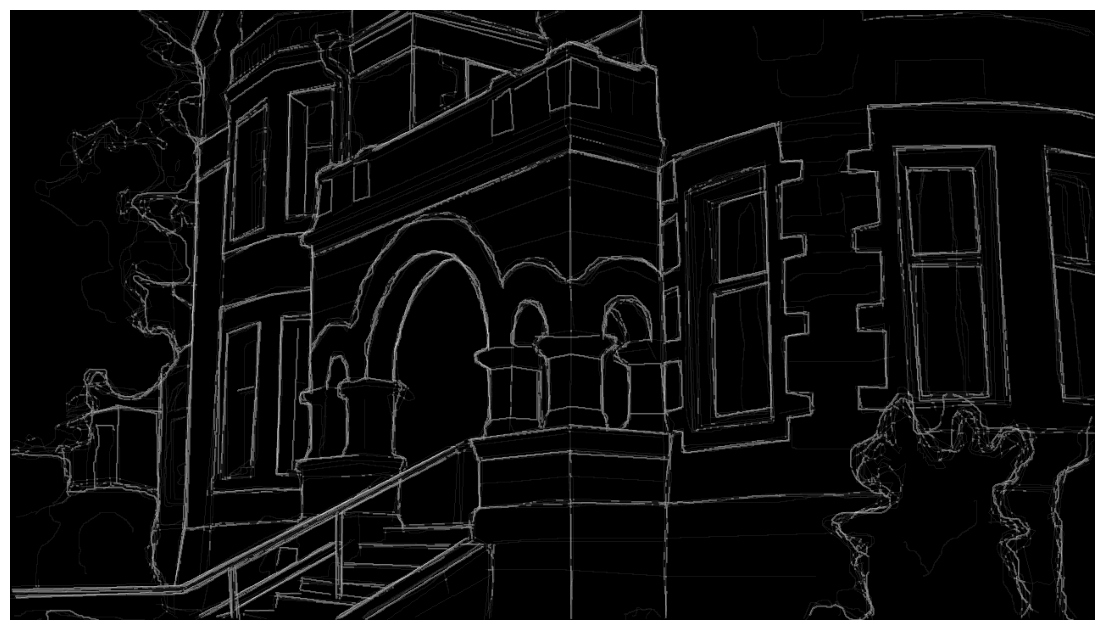

In [ ]:
PrintImage(img_test)

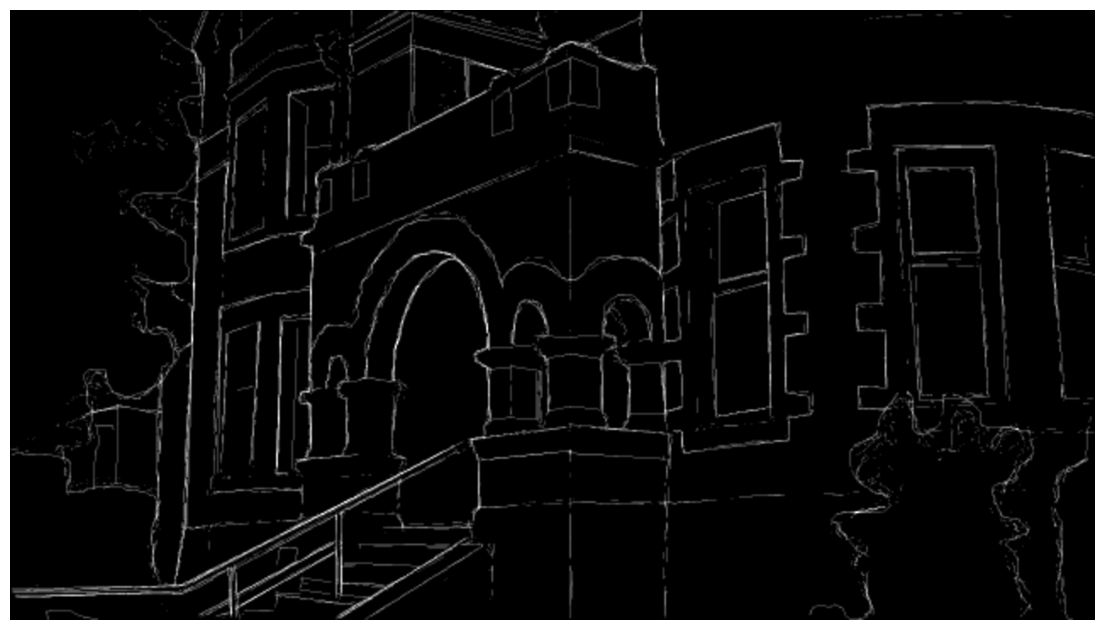

In [ ]:
PrintImage(resized)